In [19]:
import re
import time
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import (GridSearchCV, KFold, cross_val_score,
                                     train_test_split)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor


In [30]:
data = pd.read_csv('housePrice.csv')
df = data.dropna()
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [31]:
df = df[df['Area'].str.isdigit()]
df['Area'] = df['Area'].astype(float)
df['perSquare']= df['Price'] / df['Area']

Then I found the longtitude and latitude of the districts in Google Maps.

In [32]:
district = {'Shahran': [35.77, 51.28],'Qalandari': [35.7886, 51.4415],'Lavasan':[35.8186,51.6226],
            'Pardis' : [35.75 , 51.77 ],'Amir Bahador':[35.6711, 51.4034],
            'Shahrake Qods' : [35.76 , 51.37],'Ekhtiarieh':[35.7860, 51.4581],
            'Shahrake Gharb' : [35.76 , 51.37],'Ekbatan':[35.7091, 51.3026],
            'North Program Organization' :[35.73 , 51.30],'Absard': [35.6195, 51.1509],
            'Andisheh' : [35.75 , 51.27],'Haft Tir': [35.7161, 51.4254],
             'West Ferdows Boulevard':[35.73 , 51.29],'Mahallati': [35.6757, 51.5143],
             'Narmak': [35.73 , 51.50],'Ozgol':[35.7907, 51.5101],
             'Zafar': [35.76 , 51.42],'Tajrish':[35.7995, 51.4300],
             'Islamshahr': [35.54 , 51.22],'Dorous':[35.7730, 51.4550],
             'Pirouzi': [35.69, 51.46],'Abazar':[35.7326, 51.3256],
            'Shahrake Shahid Bagheri':[35.76 , 51.20],'Koohsar':[35.7643, 51.2835],
            'Moniriyeh':[35.68 , 51.40],'Parastar':[35.6816,51.4834],
            'Saadat Abad':[35.78 , 51.373],'Majidieh':[35.7350, 51.4626],
            'Amirieh' :[35.627 , 51.029],'Southern Chitgar': [35.7141, 51.1825],
            'Southern Janatabad':[35.747 , 51.300],'Karimkhan':[35.7146, 51.4199],
            'Salsabil' : [35.685 , 51.375],'Si Metri Ji':[35.6785, 51.3518],
            'Feiz Garden': [35.745 , 51.323],'Karoon':[35.6945, 51.3663],
            'Water Organization' : [35.713 , 51.399],'Northern Chitgar':[35.7237, 51.1863],
            'ShahrAra' : [35.718 , 51.373],'East Pars': [35.7409, 51.5467],
            'Gisha' : [35.734 , 51.376],'Kook':[35.7032, 51.4126],
            'Ray' : [35.570 , 51.442],'Air force': [35.7020, 51.4839],
            'Abbasabad' : [35.738 , 51.436],'Sohanak':[35.8008, 51.5325],
            'Ostad Moein' : [35.701 , 51.344],'Kamranieh':[35.6837, 51.4014],
            'Farmanieh' : [35.800 , 51.467],'Velenjak':[35.8052, 51.4021],
            'Parand' :[35.480 , 50.937],'Pasdaran':[35.7828 , 51.4675],
            'Punak' : [35.759 , 51.3385],'Chardivari':[35.7546, 51.3642],
            'Qasr-od-Dasht' : [35.6898 , 51.3699],'Zargandeh':[35.7757, 51.4324],
            'Aqdasieh' :[35.797 , 51.4865],'Gholhak':[35.7727 , 51.4438],
            'Pakdasht':[35.4716 , 51.6752],'Heravi':[35.7676 , 51.4759],
            'Railway' : [35.6618 , 51.3979],'Hashemi':[35.6893 , 51.3595],
            'Central Janatabad':[35.7578, 51.3016],'Dehkade Olampic':[35.7604, 51.2634],
            'East Ferdows Boulevard' : [35.7230 , 51.3199],'Komeil': [35.7420, 51.5602],
            'Pakdasht KhatunAbad' : [35.4992 , 51.6579],'Zibadasht':[35.7491, 51.2596],
            'Sattarkhan' : [35.7146 , 51.3643],'Damavand':[35.6924, 52.0473],
            'Baghestan' :[35.6464 , 51.1308],'Republic':[35.6975, 51.3818],
            'Shahryar' :[35.6722 , 51.0122],'Zaferanieh':[35.8098 , 51.4103],
            'Northern Janatabad' : [35.7728 , 51.3059],'Gheitarieh':[35.7929, 51.4447],
            'Daryan No' : [35.7140 , 51.3580],'Azadshahr':[35.7339, 51.1899],
            'Southern Program Organization' : [35.7259 , 51.3017],'Gandhi': [35.7526, 51.4115],
            'Rudhen' : [35.7313, 51.9011],'Niavaran':[35.8166, 51.4702],
            'West Pars' : [35.7411, 51.5321],'Amirabad':[35.7358, 51.3924],
            'Afsarieh' : [35.6539, 51.4928],'Marzdaran':[35.7349 , 51.3519],
            'Sadeghieh':[35.7188 , 51.3298],'Elahieh':[35.7904, 51.4262],
            'Chahardangeh' : [35.6061, 51.3089],'Baqershahr': [35.5339, 51.4039],
            'Jeyhoon' :[35.6896 , 51.3635],'Lavizan':[35.7748 , 51.496],
            'Shams Abad':[35.7487, 51.4717],'Fatemi':[35.7197 , 51.4033],
            'Keshavarz Boulevard':[35.7094 , 51.4004],'Kahrizak':[35.5199 ,51.3571 ],
            'Qarchak':[35.4387 , 51.5696],'Northren Jamalzadeh': [35.7040, 51.3868],
            'Azarbaijan': [35.6977 , 51.3729],'Bahar':[35.7094 , 51.4301],
            'Persian Gulf Martyrs Lake':[35.7433 , 51.5944],'Beryanak':[35.6768, 51.3764],
            'Heshmatieh':[35.7214, 51.4577],'Elm-o-Sanat':[35.7364 , 51.5051],
            'Golestan':[35.7699 , 51.4641],'Shahr-e-Ziba':[35.7478 , 51.2902],
            'Qazvin Imamzadeh Hassan':[35.7984, 50.9853],'Valiasr': [35.6505, 51.3407],
            'Mirdamad':[35.7610, 51.4264],'Razi':[35.6666, 51.3957],'Jordan':[35.7708,51.4173],
            'Shahedshahr':[35.5721, 51.0851],'Yaftabad':[35.6651, 51.3184],'Mehran':[35.7331,51.3197],
            'Nasim Shahr': [35.5640, 51.1608],'Tenant':[35.5, 51.5],'Chardangeh':[35.6055,51.3083],
            'Fallah':[35.6549, 51.3578],'Eskandari':[35.6854, 51.3810],'Shahrakeh Naft':[35.8088,51.5109],
            'Ajudaniye':[35.8073, 51.4843],'Tehransar':[35.6972, 51.2561],'Nawab':[35.6929,51.3780],
            'Yousef Abad': [35.7293, 51.4047],'Northern Suhrawardi':[35.7335, 51.4392],
            'Villa':[35.7081, 51.4151],'Hakimiyeh':[35.7367, 51.5804],'Nezamabad':[35.7186,51.4667],
            'Garden of Saba':[35.7196, 51.4392],'Tarasht': [35.7064, 51.3459],'Azari':[35.6673,51.3518],
            'Dezashib':[35.8097, 51.4530],'Shahrake Apadana': [35.7061, 51.3273],'Araj':[35.7909,51.4881],
            'Mahmoudieh':[35.7926, 51.4155],'Vahidieh':[35.4850, 51.0828],'Malard':[35.6656,50.9772],
            'Shahrake Azadi': [35.7097, 51.2743],'Darband':[35.8240, 51.4254],'Tehran Now':[35.7093, 51.4945],
            'Darabad':[35.8171, 51.4906],'Eram':[35.7255, 51.2921],'Atabak':[35.6493,51.4603],
            'Sabalan':[35.7885, 51.4987],'SabaShahr':[35.5813, 51.1116],'Shahrake Madaen':[35.4773,51.7188],
            'Waterfall':[35.6788, 51.4425],'Ahang':[35.6621, 51.4839],'Salehabad':[35.5044, 51.1894],
            'Pishva':[35.3054, 51.7147],'Enghelab':[35.7012, 51.3937],'Islamshahr Elahieh':[35.5722,51.2409],
            'Ray - Montazeri':[35.6054,51.4306],'Firoozkooh Kuhsar':[35.7590,52.7684],'Ghoba':[35.7612,51.4494],
            'Hekmat':[35.8007, 51.4421],'Mehrabad':[35.6719, 51.3336],'Southern Suhrawardi':[35.7202,51.4340],
            'Abuzar':[35.7318, 51.3260],'Dolatabad':[35.6170, 51.4486],'Hor Square':[35.6928,51.3876],
            'Taslihat':[35.7197, 51.4734],'Kazemabad':[35.4462, 51.1625],
            'Robat Karim': [35.4880, 51.0730],'Ray - Pilgosh':[35.5929,51.4392],'Ghiyamdasht':[35.5246, 51.6492],
            'Telecommunication':[35.7496, 51.2921],'Mirza Shirazi': [35.7272, 51.4151],
            'Seyed Khandan': [35.7401, 51.4479],'Shahrake Quds':[35.7597, 51.3717],'Safadasht':[35.6935, 50.8444],
            'Khademabad Garden': [35.6557, 51.1146] , 'Hassan Abad':[35.6864, 51.4097],
            'Chidz': [35.7990, 51.4556],'Khavaran':[35.6662,51.4515],'Argentina':[35.7361,51.4143],
            'Boloorsazi':[35.3747, 51.6006],'Mehrabad River River':[35.6250, 51.2849],
            'Varamin - Beheshti':[35.3222,51.6440],'Shoosh':[35.6406,51.4440],'Vanak':[35.7571,51.4114],
            'Thirteen November': [35.6366, 51.2112],'Darakeh':[35.8074, 51.3813],'Aliabad South':[35.6272, 51.4206],
            'Alborz Complex': [35.7596, 51.2350],'Firoozkooh':[35.7589,52.7678],'Vahidiyeh':[35.7152,51.4702],
            'Shadabad':[35.6578, 51.3036],'Naziabad':[35.6406, 51.4031],'Javadiyeh':[35.6543,51.3898],
            'Yakhchiabad':[35.6259, 51.4022]}

In [33]:
df['Latitude'] = df.Address.map(lambda x: district[x][0])
df['Longtitude'] = df.Address.map(lambda x: district[x][1])

Removing the `outliers`

In [34]:
df= df[ df['perSquare'] < np.quantile(df['perSquare'], .9)]

In [35]:
boolean_features = ['Parking','Warehouse','Elevator']
df[boolean_features] = df[boolean_features].astype(np.int8)

In [36]:
px.imshow(df.corr())

/home/kamyar/miniconda3/envs/vision/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/kamyar/miniconda3/envs/vision/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/kamyar/miniconda3/envs/vision/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level f

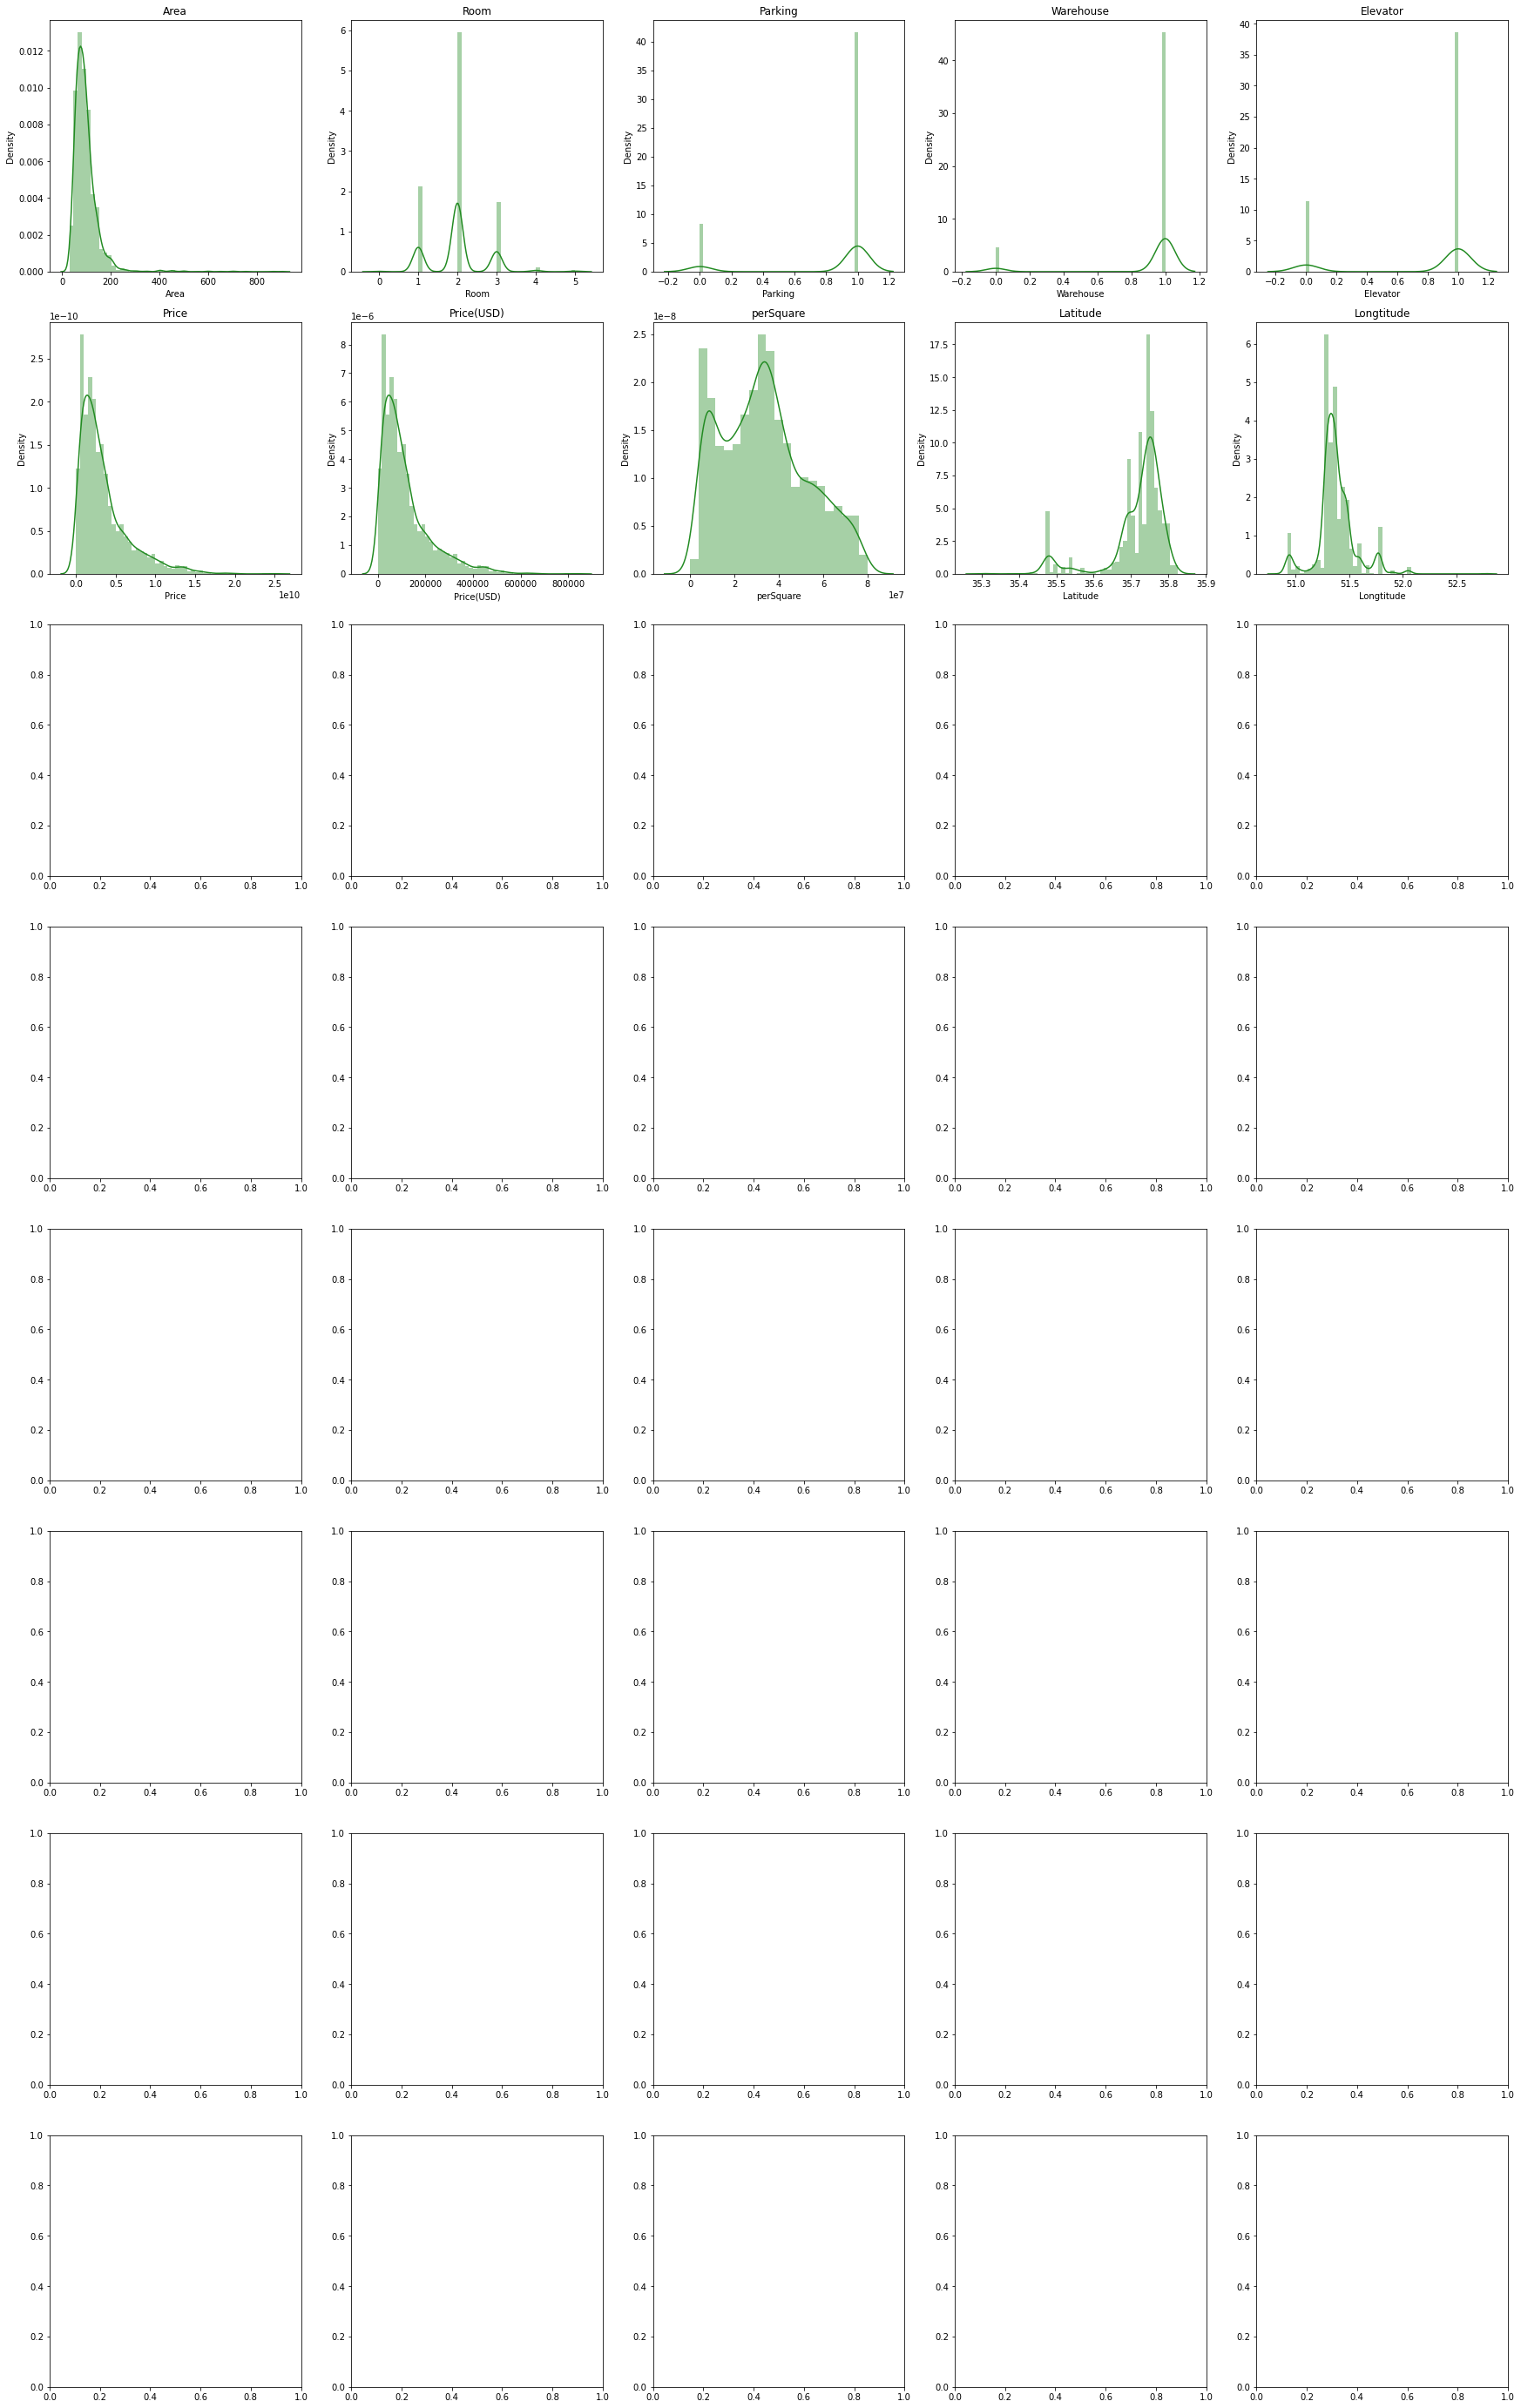

In [39]:
df_distplot= df.drop(['Address'],axis=1)
fig, axes = plt.subplots(nrows = 8, ncols = 5)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(30, 50)

for ax, col in zip(axes, df_distplot.columns):
  sns.distplot(df_distplot[col], ax = ax, color='forestgreen')
  ax.set_title(col)

In [8]:
one_hot = pd.get_dummies(df['Address'])
df = df.drop('Address',axis = 1)
df = df.join(one_hot)

In [9]:
X = df.drop(columns = ['Price', 'perSquare', 'Price(USD)'])
y = df['Price']

In [11]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Code clonned from Soheil Tehranipour
def parameter_finder (model, parameters):
    
    start = time.time()
    
    grid = GridSearchCV(model, 
                        param_grid = parameters,
                        cv = 10, 
                        n_jobs = -1)
    
    grid_fit = grid.fit(X_train, y_train)
    y_train_pred = grid_fit.predict(X_train)
    y_pred = grid_fit.predict(X_test)
    
    train_score =grid_fit.score(X_train, y_train)
    test_score = grid_fit.score(X_test, y_test)
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    
    model_name = str(model).split('(')[0]
    
    end = time.time()
    
    print(f"The best parameters for {model_name} model is: {grid_fit.best_params_}")
    print("--" * 10)
    print(f"(R2 score) in the training set is {train_score:0.2%} for {model_name} model.")
    print(f"(R2 score) in the testing set is {test_score:0.2%} for {model_name} model.")
    print(f"RMSE is {RMSE:,} for {model_name} model.")
    print("--" * 10)
    print(f"Runtime of the program is: {end - start:0.2f}")
    
       
    return train_score, test_score, RMSE

In [13]:
rfr = RandomForestRegressor(random_state = 1, n_jobs = -1)
param_rfr = {'min_samples_split': [8],
            'max_depth': [65],
            'n_estimators' : [50]}

rfr_train_score, rfr_test_score, rfr_RMSE = parameter_finder(rfr, param_rfr)
# %%


The best parameters for RandomForestRegressor model is: {'max_depth': 65, 'min_samples_split': 8, 'n_estimators': 50}
--------------------
(R2 score) in the training set is 95.45% for RandomForestRegressor model.
(R2 score) in the testing set is 86.24% for RandomForestRegressor model.
RMSE is 1,190,436,346.6140068 for RandomForestRegressor model.
--------------------
Runtime of the program is: 2.18


In [17]:
xgboost = XGBRegressor(n_jobs = -1)
param_xgboost = {'n_estimators': [200],
             'learning_rate': [0.05],
             'subsample': [0.75],
             'colsample_bytree': [.65],
             'max_depth': [11],
             'gamma': [0 ]}

xgboost_train_score, xgboost_test_score, xgboost_RMSE = parameter_finder(xgboost, param_xgboost)

The best parameters for XGBRegressor model is: {'colsample_bytree': 0.65, 'gamma': 0, 'learning_rate': 0.05, 'max_depth': 11, 'n_estimators': 200, 'subsample': 0.75}
--------------------
(R2 score) in the training set is 98.43% for XGBRegressor model.
(R2 score) in the testing set is 87.52% for XGBRegressor model.
RMSE is 1,134,087,868.72916 for XGBRegressor model.
--------------------
Runtime of the program is: 11.32
